In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sms
import seaborn as sns

In [2]:
df = pd.read_csv("Top 50 US Tech Companies 2022 - 2023.csv")

In [3]:
df.head(1)

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.52,AAPL,18.314,164000


In [4]:
df['Sector'].unique()

array(['Consumer Electronics', 'Software Infrastructure',
       'Software Application', 'Semiconductors',
       'Communication Equipments', 'IT Services', 'Computer Hardware',
       'Electronic Components'], dtype=object)

<AxesSubplot:>

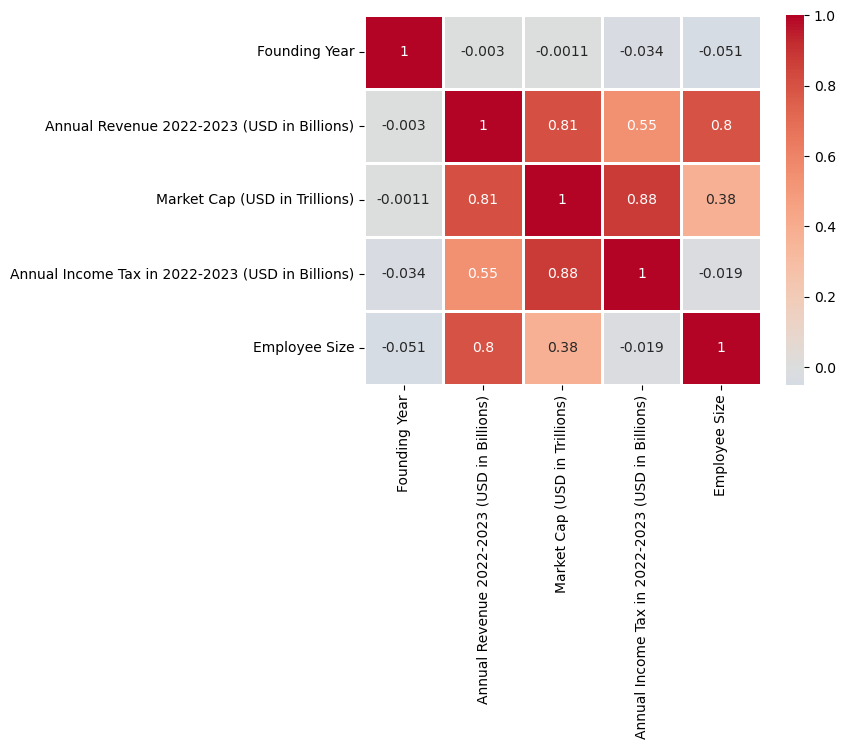

In [5]:
#Correlation Matrix
sns.heatmap(df.corr(), 
           center = 0,
           annot = True,
           fmt = '.2g',
            linewidth = 1,
           cmap = 'coolwarm')

In [6]:
df.describe()

,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
count,50.000000,50.00000,50.000000,50.000000,5.000000e+01
mean,1984.140000,51.20440,0.252160,1.386780,8.324962e+04
std,24.988985,97.41288,0.490377,3.687916,2.205869e+05
min,1890.000000,2.06000,0.028000,-3.217000,2.993000e+03
25%,1977.250000,7.65250,0.051250,0.098750,1.415000e+04
50%,1988.500000,17.66500,0.082500,0.280500,2.472500e+04
75%,1999.750000,40.81500,0.160250,0.945000,7.015575e+04
max,2012.000000,513.98000,2.520000,18.314000,1.541000e+06


In [7]:
features = ["Annual Revenue 2022-2023 (USD in Billions)", "Market Cap (USD in Trillions)", "Annual Income Tax in 2022-2023 (USD in Billions)", "Employee Size"]

In [8]:
df["Sector"].value_counts()

Software Application        15
Semiconductors              14
Software Infrastructure     12
IT Services                  3
Computer Hardware            3
Consumer Electronics         1
Communication Equipments     1
Electronic Components        1
Name: Sector, dtype: int64

In [9]:
sector_enconding = {
    "Software Application": 1,
    "Semiconductors": 2,
    "Software Infrastructure": 3,
    "IT Services": 4,
    "Computer Hardware": 5,
    "Consumer Electronics": 6,
    "Communication Equipments": 7, 
    "Electronic Components": 8
}

df["Sector ENC"] = df["Sector"].map(sector_enconding)
df.head(1)

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.52,AAPL,18.314,164000,6


In [10]:
target = 'Sector ENC'

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df[target], test_size = 0.2, random_state = 1502)

In [13]:
#RAndom Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [14]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [15]:
Y_pred = model.predict(X_test)

In [16]:
acc = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", acc, "%")
print("Classification Report: ")
print(classification_report(Y_test, Y_pred))

Accuracy:  10.0 %
Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.25      0.50      0.33         2
           4       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.05      0.10      0.07        10
weighted avg       0.05      0.10      0.07        10



/Users/serbantimofte/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/serbantimofte/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/serbantimofte/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Us

In [66]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances


df[features] = df[features].astype(str)

def calculate_biggest_competitor(company_name):

    company_row = df[df['Company Name'].str.lower() == company_name.lower()] 
    
    if len(company_row) == 0:
        print("Company not found.")
        return None

    company_features = company_row[features].values[0] 
    
    # Calculate Euclidean distances between companies
    company_features = company_features.astype(float)  
    feature_matrix = df[features].astype(float) 
    distances = euclidean_distances([company_features], feature_matrix)[0]

    company_index = company_row.index[0]

    distances[company_index] = float('inf')

    closest_competitor_index = distances.argmin()

    biggest_competitor = df.loc[closest_competitor_index, 'Company Name']
    
    return biggest_competitor

# Add a new column for the biggest competitor
df['Biggest Competitor'] = df['Company Name'].apply(calculate_biggest_competitor)  

In [67]:
df.head()  

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Estimated Next Revenue,Biggest Competitor,Competitor Sector,Competitor Est Next Revenue,TW Sentimental Rating,Estimated Next Revenue with TW score
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.52,AAPL,18.314,164000,6,359.312199,Oracle Corporation,Software Infrastructure,61.541139,3.9,359.312199
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000,3,125.369448,Alphabet (Google),Software Infrastructure,-90.561699,3.7,125.369448
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.35,GOOG,11.356,190234,3,-90.561699,Apple Inc.,Consumer Electronics,359.312199,3.8,-90.561699
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.03,AMZN,-3.217,1541000,1,581.781265,IBM Corporation,IT Services,-177.553653,3.9,581.781265
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473,2,9.971619,Microchip Technology Inc.,Semiconductors,-3.997347,3.0,9.971619


In [77]:
print(df[['Company Name', 'Biggest Competitor']])

                         Company Name                 Biggest Competitor
0                          Apple Inc.                 Oracle Corporation
1               Microsoft Corporation                  Alphabet (Google)
2                   Alphabet (Google)                         Apple Inc.
3                              Amazon                    IBM Corporation
4                  NVIDIA Corporation          Microchip Technology Inc.
5                               Tesla                  Intel Corporation
6                      Meta Platforms                     IQVIA Holdings
7                       Broadcom Inc.                    ServiceNow Inc.
8                  Oracle Corporation             Dell Technologies Inc.
9                  Cisco Systems Inc.                     IQVIA Holdings
10                    Salesforce Inc.                 Cisco Systems Inc.
11                         Adobe Inc.               PayPal Holdings Inc.
12             Texas Instruments Inc.             A

In [23]:
df["Biggest Competitor"].value_counts()

Qualcomm Inc.                        3
Booking Holdings                     2
IQVIA Holdings                       2
Texas Instruments Inc.               2
Dell Technologies Inc.               2
ServiceNow Inc.                      2
Applied Materials Inc.               2
Intel Corporation                    2
Airbnb                               2
Synopsys Inc.                        2
Cadence Design Systems Inc.          1
Equinix                              1
Micron Technology                    1
Intuit Inc.                          1
Snowflake Inc.                       1
GlobalFoundries                      1
Block Inc.                           1
Roper Technologies                   1
Palo Alto Networks Inc.              1
Autodesk Inc.                        1
Netflix                              1
KLA Corporation                      1
Fortinet Inc.                        1
Oracle Corporation                   1
Marvell Technology Inc.              1
Adobe Inc.               

In [24]:
df["Competitor Sector"] = df["Biggest Competitor"].map(df.set_index("Company Name")["Sector"])
df.rename(columns = {"Sector" : "Primary Sector"}, inplace = True)

In [25]:
df.head()

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Biggest Competitor,Competitor Sector
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.52,AAPL,18.314,164000,6,Oracle Corporation,Software Infrastructure
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000,3,Alphabet (Google),Software Infrastructure
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.35,GOOG,11.356,190234,3,Apple Inc.,Consumer Electronics
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.03,AMZN,-3.217,1541000,1,IBM Corporation,IT Services
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473,2,Microchip Technology Inc.,Semiconductors


In [26]:
df["Market Cap (USD in Trillions)"] = df["Market Cap (USD in Trillions)"].astype(float)

In [27]:
df.head(1)

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Biggest Competitor,Competitor Sector
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.52,AAPL,18.314,164000,6,Oracle Corporation,Software Infrastructure


In [28]:
#I want to study the annual revenue looking at the annual revenue of the biggest competitor (multilinear regression taking into consideration MarketCap)

In [29]:
dfMR = df.copy()
dfMR.head(1)

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Biggest Competitor,Competitor Sector
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.52,AAPL,18.314,164000,6,Oracle Corporation,Software Infrastructure


In [30]:
dfMR["Comp Annual Rev"] = dfMR["Biggest Competitor"].map(df.set_index("Company Name")["Annual Revenue 2022-2023 (USD in Billions)"])

In [31]:
dfMR["Comp Market Cap"] = dfMR["Biggest Competitor"].map(df.set_index("Company Name")["Market Cap (USD in Trillions)"])
dfMR["Comp Inc Tax"] = dfMR["Biggest Competitor"].map(df.set_index("Company Name")["Annual Income Tax in 2022-2023 (USD in Billions)"])
dfMR.head()

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Biggest Competitor,Competitor Sector,Comp Annual Rev,Comp Market Cap,Comp Inc Tax
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000,6,Oracle Corporation,Software Infrastructure,46.07,0.236,0.932
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000,3,Alphabet (Google),Software Infrastructure,282.83,1.350,11.356
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234,3,Apple Inc.,Consumer Electronics,387.53,2.520,18.314
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000,1,IBM Corporation,IT Services,60.52,0.113,-0.626
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473,2,Microchip Technology Inc.,Semiconductors,8.05,0.045,0.197


In [32]:
dfMR.drop(["Company Name", "Industry", "Primary Sector", "HQ State", "Founding Year", "Stock Name", "Sector ENC", "Biggest Competitor", "Competitor Sector"], axis = 1, inplace=True)

In [33]:
dfMR.head(1)

,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Comp Annual Rev,Comp Market Cap,Comp Inc Tax
0,387.53,2.52,18.314,164000,46.07,0.236,0.932


<AxesSubplot:>

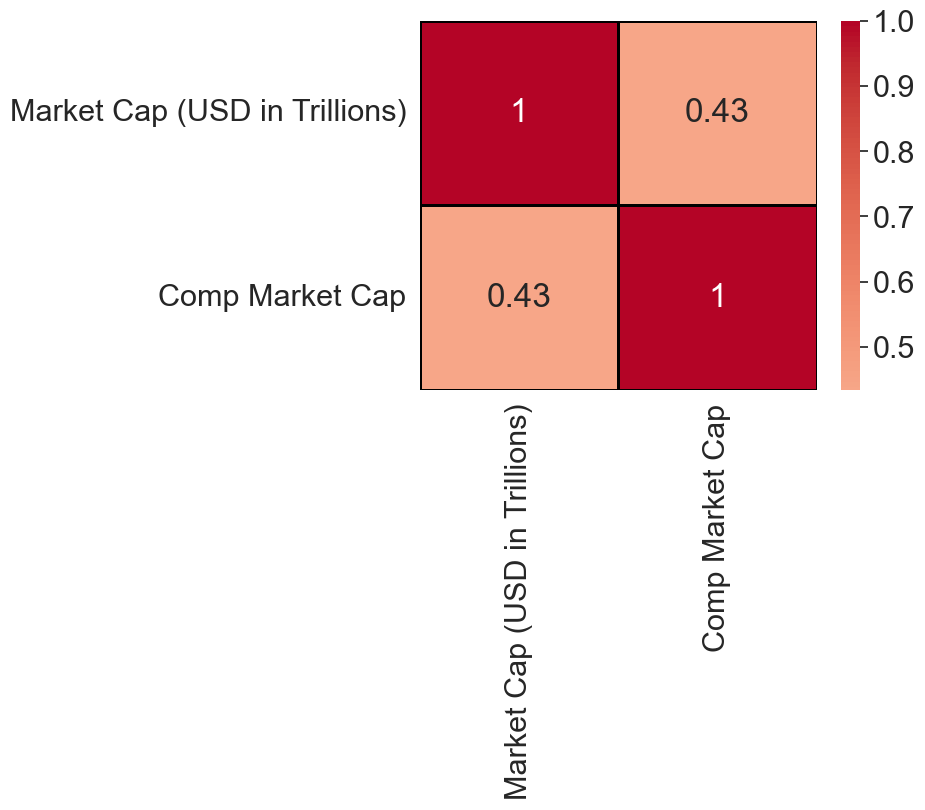

In [34]:
sns.set(font_scale = 2)
sns.heatmap(data = dfMR.corr(),
           annot = True,
           fmt = '.2g',
           center = 0,
           cmap = "coolwarm",
           linewidth = 1,
           linecolor = 'black')

In [35]:
#Convert data types
dfMR["Annual Income Tax in 2022-2023 (USD in Billions)"] = dfMR["Annual Income Tax in 2022-2023 (USD in Billions)"].astype(float)
dfMR["Employee Size"] = dfMR["Employee Size"].astype(int)
dfMR["Comp Market Cap"] = dfMR["Comp Market Cap"].astype(float)
dfMR["Comp Annual Rev"] = dfMR["Comp Annual Rev"].astype(float)
dfMR["Comp Inc Tax"] = dfMR["Comp Inc Tax"].astype(float)

In [36]:
#Isolate X and Y
y = dfMR["Annual Revenue 2022-2023 (USD in Billions)"]
y = y.astype(float)
x = dfMR.drop(columns = ["Annual Revenue 2022-2023 (USD in Billions)"])
y.head(1)

0    387.53
Name: Annual Revenue 2022-2023 (USD in Billions), dtype: float64

In [37]:
x.head(1)

,Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Comp Annual Rev,Comp Market Cap,Comp Inc Tax
0,2.52,18.314,164000,46.07,0.236,0.932


In [38]:
#Add constant
x = sms.add_constant(x)
x.head()

,const,Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Comp Annual Rev,Comp Market Cap,Comp Inc Tax
0,1.0,2.520,18.314,164000,46.07,0.236,0.932
1,1.0,2.037,15.139,221000,282.83,1.350,11.356
2,1.0,1.350,11.356,190234,387.53,2.520,18.314
3,1.0,1.030,-3.217,1541000,60.52,0.113,-0.626
4,1.0,0.653,0.189,22473,8.05,0.045,0.197


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=1502)

In [40]:
print(x_train.dtypes)
print("-----")
print(y_train.dtypes)

const                                               float64
Market Cap (USD in Trillions)                       float64
Annual Income Tax in 2022-2023 (USD in Billions)    float64
Employee Size                                         int64
Comp Annual Rev                                     float64
Comp Market Cap                                     float64
Comp Inc Tax                                        float64
dtype: object
-----
float64


In [41]:
model = sms.OLS(y_train, x_train).fit()
print(model.summary())

                                        OLS Regression Results                                        
Dep. Variable:     Annual Revenue 2022-2023 (USD in Billions)   R-squared:                       0.966
Model:                                                    OLS   Adj. R-squared:                  0.959
Method:                                         Least Squares   F-statistic:                     154.8
Date:                                        Sat, 08 Jul 2023   Prob (F-statistic):           1.04e-22
Time:                                                16:23:35   Log-Likelihood:                -176.06
No. Observations:                                          40   AIC:                             366.1
Df Residuals:                                              33   BIC:                             378.0
Df Model:                                                   6                                         
Covariance Type:                                    nonrobust            

In [42]:
predictions = model.predict(x_test)
print(predictions)

23    15.290875
5     85.703152
25     4.308967
15    21.811002
8     56.028834
46    -3.797655
38    15.882398
9     74.113150
16    33.382017
47    16.835133
dtype: float64


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print( "MAE: ", round(mean_absolute_error(y_test, predictions), 1))
print( "RMSE: ", round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE:  11.9
RMSE:  14.5


Small difference => variance does not affect significantly the data set

In [44]:
# Coefficient values from the multilinear regression model
coefficients = [1.3556, -0.0097, 16.8470, 0.0004, 0.0803, 0.1365, -21.3375]

# Independent variable values for which you want to predict y
independent_variables = [1, 0.5, 10, 1000, 0.2, 0.8, 5]

# Compute the predicted value of y
predicted_y = np.dot(coefficients, independent_variables)

print("Predicted y:", predicted_y)

Predicted y: 63.658510000000035


Linner Regression Annual Revenue - Annual Income Tax

In [45]:
y = dfMR["Annual Revenue 2022-2023 (USD in Billions)"]
x = dfMR["Annual Income Tax in 2022-2023 (USD in Billions)"]
y = y.astype(float)
x = x.astype(float)
model1 = sms.OLS(y, x).fit()
print(model1.summary())

                                             OLS Regression Results                                            
Dep. Variable:     Annual Revenue 2022-2023 (USD in Billions)   R-squared (uncentered):                   0.381
Model:                                                    OLS   Adj. R-squared (uncentered):              0.368
Method:                                         Least Squares   F-statistic:                              30.17
Date:                                        Sat, 08 Jul 2023   Prob (F-statistic):                    1.40e-06
Time:                                                16:24:26   Log-Likelihood:                         -293.61
No. Observations:                                          50   AIC:                                      589.2
Df Residuals:                                              49   BIC:                                      591.1
Df Model:                                                   1                                           

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

def estimate_next_year_revenue(df, company_name):
    # Filter the DataFrame for the specified company
    company_df = df[df['Company Name'] == company_name]

    # Extract the relevant columns
    revenue = company_df['Annual Revenue'].values
    income_tax = company_df['Annual Income Tax'].values
    employee_size = company_df['Employee Size'].values
    comp_annual_rev = company_df['Comp Annual Rev'].values
    comp_market_cap = company_df['Comp Market Cap'].values
    market_cap = company_df['Market Cap'].values
    comp_inc_tax = company_df['Comp Inc Tax'].values

    # Combine the features into a single input array
    X = np.column_stack((income_tax, employee_size, comp_annual_rev, comp_market_cap, market_cap, comp_inc_tax))

    # Define the SARIMAX model parameters (you may need to adjust the parameters according to your data)
    order = (1, 0, 0)  # ARIMA order
    seasonal_order = (0, 1, 1, 12)  # Seasonal order

    # Fit the SARIMAX model
    model = SARIMAX(revenue, exog=X, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)

    # Forecast the next year revenue
    next_year_forecast = model_fit.forecast(steps=12, exog=X[-12:])

    # Create a DataFrame to store the forecast results
    forecast_df = pd.DataFrame({
        'Year': range(df['Year'].max() + 1, df['Year'].max() + 13),  # Assuming Year column exists in the DataFrame
        'Estimated Revenue': next_year_forecast
    })

    return forecast_df

# Usage example
company_name = 'Apple Inc'
next_year_forecast_df = estimate_next_year_revenue(df, company_name)
print(next_year_forecast_df)

In [46]:
def calculate_next_revenue(row):
    const = 1.3556
    market_cap = row['Market Cap (USD in Trillions)']
    income_tax = row['Annual Income Tax in 2022-2023 (USD in Billions)']
    employee_size = row['Employee Size']
    comp_annual_rev = row['Comp Annual Rev']
    comp_market_cap = row['Comp Market Cap']
    comp_inc_tax = row['Comp Inc Tax']
    
    estimated_next_revenue = const - 0.0097 * market_cap + 16.8470 * income_tax + 0.0004 * employee_size + 0.0803 * comp_annual_rev + 0.1365 * comp_market_cap - 21.3375 * comp_inc_tax
    
    return estimated_next_revenue

dfMR['Estimated Next Revenue'] = dfMR.apply(calculate_next_revenue, axis=1)

In [47]:
dfMR.head()

,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Comp Annual Rev,Comp Market Cap,Comp Inc Tax,Estimated Next Revenue
0,387.53,2.520,18.314,164000,46.07,0.236,0.932,359.312199
1,204.09,2.037,15.139,221000,282.83,1.350,11.356,125.369448
2,282.83,1.350,11.356,190234,387.53,2.520,18.314,-90.561699
3,513.98,1.030,-3.217,1541000,60.52,0.113,-0.626,581.781265
4,26.97,0.653,0.189,22473,8.05,0.045,0.197,9.971619


In [48]:
df.head()

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Biggest Competitor,Competitor Sector
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000,6,Oracle Corporation,Software Infrastructure
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000,3,Alphabet (Google),Software Infrastructure
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234,3,Apple Inc.,Consumer Electronics
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000,1,IBM Corporation,IT Services
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473,2,Microchip Technology Inc.,Semiconductors


In [49]:
df.insert(11, "Estimated Next Revenue", dfMR["Estimated Next Revenue"])
df.head()

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Estimated Next Revenue,Biggest Competitor,Competitor Sector
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000,6,359.312199,Oracle Corporation,Software Infrastructure
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000,3,125.369448,Alphabet (Google),Software Infrastructure
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234,3,-90.561699,Apple Inc.,Consumer Electronics
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000,1,581.781265,IBM Corporation,IT Services
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473,2,9.971619,Microchip Technology Inc.,Semiconductors


In [50]:
df["Competitor Est Next Revenue"] = df["Biggest Competitor"].map(df.set_index("Company Name")["Estimated Next Revenue"])
df.head()

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Estimated Next Revenue,Biggest Competitor,Competitor Sector,Competitor Est Next Revenue
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000,6,359.312199,Oracle Corporation,Software Infrastructure,61.541139
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000,3,125.369448,Alphabet (Google),Software Infrastructure,-90.561699
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234,3,-90.561699,Apple Inc.,Consumer Electronics,359.312199
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000,1,581.781265,IBM Corporation,IT Services,-177.553653
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473,2,9.971619,Microchip Technology Inc.,Semiconductors,-3.997347


In [51]:
df["Company Name"].value_counts()

Apple Inc.                           1
VMware Inc.                          1
Lam Research Corporation             1
Uber Technologies Inc.               1
Micron Technology                    1
Equinix                              1
Activision Blizzard                  1
Palo Alto Networks Inc.              1
Synopsys Inc.                        1
Cadence Design Systems Inc.          1
KLA Corporation                      1
Arista Networks Inc.                 1
Workday Inc.                         1
Microsoft Corporation                1
Fortinet Inc.                        1
Block Inc.                           1
Snowflake Inc.                       1
Roper Technologies                   1
Microchip Technology Inc.            1
Autodesk Inc.                        1
GlobalFoundries                      1
IQVIA Holdings                       1
Marvell Technology Inc.              1
Dell Technologies Inc.               1
Fiserv Inc.                          1
Airbnb                   

In [52]:
dfSent = pd.read_csv("Top-50-Sent.csv")
dfSent.head()

,Company Name,Unnamed: 1,Sector,HQ State,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Sentimental Grade
0,Apple Inc.,NaN,Consumer Electronics,California,NaN,NaN,NaN,NaN,NaN,NaN,3.9
1,Microsoft Corporation,NaN,Software Infrastructure,Washington,NaN,NaN,NaN,NaN,NaN,NaN,3.7
2,Alphabet (Google),NaN,Software Infrastructure,California,NaN,NaN,NaN,NaN,NaN,NaN,3.8
3,Amazon,NaN,Software Application,Washington,NaN,NaN,NaN,NaN,NaN,NaN,3.9
4,NVIDIA Corporation,NaN,Semiconductors,California,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [53]:
dfSent.drop(columns = ["Unnamed: 1", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9"])

,Company Name,Sector,HQ State,Sentimental Grade
0,Apple Inc.,Consumer Electronics,California,3.90
1,Microsoft Corporation,Software Infrastructure,Washington,3.70
2,Alphabet (Google),Software Infrastructure,California,3.80
3,Amazon,Software Application,Washington,3.90
4,NVIDIA Corporation,Semiconductors,California,3.00
5,Tesla,Software Infrastructure,Texas,3.45
6,Meta Platforms,Software Infrastructure,California,2.00
7,Broadcom Inc.,Semiconductors,California,3.40
8,Oracle Corporation,Software Infrastructure,Texas,2.00
9,Cisco Systems Inc.,Communication Equipments,California,3.00


In [54]:
df["TW Sentimental Rating"] = dfSent.iloc[:, -1]
df.head()

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Estimated Next Revenue,Biggest Competitor,Competitor Sector,Competitor Est Next Revenue,TW Sentimental Rating
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000,6,359.312199,Oracle Corporation,Software Infrastructure,61.541139,3.9
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000,3,125.369448,Alphabet (Google),Software Infrastructure,-90.561699,3.7
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234,3,-90.561699,Apple Inc.,Consumer Electronics,359.312199,3.8
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000,1,581.781265,IBM Corporation,IT Services,-177.553653,3.9
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473,2,9.971619,Microchip Technology Inc.,Semiconductors,-3.997347,3.0


In [55]:
dfMR["TW Sentimental Rating"] = dfSent.iloc[:, -1]
dfMR.head()

,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Comp Annual Rev,Comp Market Cap,Comp Inc Tax,Estimated Next Revenue,TW Sentimental Rating
0,387.53,2.520,18.314,164000,46.07,0.236,0.932,359.312199,3.9
1,204.09,2.037,15.139,221000,282.83,1.350,11.356,125.369448,3.7
2,282.83,1.350,11.356,190234,387.53,2.520,18.314,-90.561699,3.8
3,513.98,1.030,-3.217,1541000,60.52,0.113,-0.626,581.781265,3.9
4,26.97,0.653,0.189,22473,8.05,0.045,0.197,9.971619,3.0


In [56]:
#Isolate X and Y
y = dfMR["Annual Revenue 2022-2023 (USD in Billions)"]
y = y.astype(float)
x = dfMR.drop(columns = ["Annual Revenue 2022-2023 (USD in Billions)"])
x = x.astype(float)
y.head(1)

0    387.53
Name: Annual Revenue 2022-2023 (USD in Billions), dtype: float64

In [57]:
x.head()

,Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Comp Annual Rev,Comp Market Cap,Comp Inc Tax,Estimated Next Revenue,TW Sentimental Rating
0,2.520,18.314,164000.0,46.07,0.236,0.932,359.312199,3.9
1,2.037,15.139,221000.0,282.83,1.350,11.356,125.369448,3.7
2,1.350,11.356,190234.0,387.53,2.520,18.314,-90.561699,3.8
3,1.030,-3.217,1541000.0,60.52,0.113,-0.626,581.781265,3.9
4,0.653,0.189,22473.0,8.05,0.045,0.197,9.971619,3.0


In [58]:
x = sms.add_constant(x)
x.head()

,const,Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Comp Annual Rev,Comp Market Cap,Comp Inc Tax,Estimated Next Revenue,TW Sentimental Rating
0,1.0,2.520,18.314,164000.0,46.07,0.236,0.932,359.312199,3.9
1,1.0,2.037,15.139,221000.0,282.83,1.350,11.356,125.369448,3.7
2,1.0,1.350,11.356,190234.0,387.53,2.520,18.314,-90.561699,3.8
3,1.0,1.030,-3.217,1541000.0,60.52,0.113,-0.626,581.781265,3.9
4,1.0,0.653,0.189,22473.0,8.05,0.045,0.197,9.971619,3.0


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=1502)

In [60]:
model = sms.OLS(y_train, x_train).fit()
print(model.summary())

                                        OLS Regression Results                                        
Dep. Variable:     Annual Revenue 2022-2023 (USD in Billions)   R-squared:                       0.967
Model:                                                    OLS   Adj. R-squared:                  0.959
Method:                                         Least Squares   F-statistic:                     132.2
Date:                                        Sat, 08 Jul 2023   Prob (F-statistic):           8.98e-22
Time:                                                16:26:32   Log-Likelihood:                -175.54
No. Observations:                                          40   AIC:                             367.1
Df Residuals:                                              32   BIC:                             380.6
Df Model:                                                   7                                         
Covariance Type:                                    nonrobust            

In [61]:
def calculate_next_revenueSM(row):
    const = -18.5980
    market_cap = row['Market Cap (USD in Trillions)']
    income_tax = row['Annual Income Tax in 2022-2023 (USD in Billions)']
    employee_size = row['Employee Size']
    comp_annual_rev = row['Comp Annual Rev']
    comp_market_cap = row['Comp Market Cap']
    comp_inc_tax = row['Comp Inc Tax']
    tw_sentimental_rating = row["TW Sentimental Rating"]
    
    estimated_next_revenue = const - 0.0158 * market_cap + 17.3563 * income_tax + 0.0004 * employee_size - 0.0607 * comp_annual_rev + 0.1347 * comp_market_cap - 20.9629 * comp_inc_tax + 7.3779
    
    return estimated_next_revenue

dfMR['Estimated Next Revenue with TW score'] = dfMR.apply(calculate_next_revenue, axis=1)

In [62]:
dfMR.head()

,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Comp Annual Rev,Comp Market Cap,Comp Inc Tax,Estimated Next Revenue,TW Sentimental Rating,Estimated Next Revenue with TW score
0,387.53,2.520,18.314,164000,46.07,0.236,0.932,359.312199,3.9,359.312199
1,204.09,2.037,15.139,221000,282.83,1.350,11.356,125.369448,3.7,125.369448
2,282.83,1.350,11.356,190234,387.53,2.520,18.314,-90.561699,3.8,-90.561699
3,513.98,1.030,-3.217,1541000,60.52,0.113,-0.626,581.781265,3.9,581.781265
4,26.97,0.653,0.189,22473,8.05,0.045,0.197,9.971619,3.0,9.971619


In [63]:
last_column = dfMR.iloc[:, -1]
df = pd.concat([df, last_column], axis = 1)
df.head()

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Estimated Next Revenue,Biggest Competitor,Competitor Sector,Competitor Est Next Revenue,TW Sentimental Rating,Estimated Next Revenue with TW score
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000,6,359.312199,Oracle Corporation,Software Infrastructure,61.541139,3.9,359.312199
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000,3,125.369448,Alphabet (Google),Software Infrastructure,-90.561699,3.7,125.369448
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234,3,-90.561699,Apple Inc.,Consumer Electronics,359.312199,3.8,-90.561699
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000,1,581.781265,IBM Corporation,IT Services,-177.553653,3.9,581.781265
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473,2,9.971619,Microchip Technology Inc.,Semiconductors,-3.997347,3.0,9.971619


In [ ]:
features = ["Annual Revenue 2022-2023 (USD in Billions)", "Market Cap (USD in Trillions)", "Annual Income Tax in 2022-2023 (USD in Billions)", "Employee Size", "TW Sentimental Rating"]


In [74]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances


df[features] = df[features].astype(str)

def calculate_biggest_competitor(company_name):

    company_row = df[df['Company Name'].str.lower() == company_name.lower()] 
    
    if len(company_row) == 0:
        print("Company not found.")
        return None

    company_features = company_row[features].values[0] 
    
    # Calculate Euclidean distances between companies
    company_features = company_features.astype(float)  
    feature_matrix = df[features].astype(float) 
    distances = euclidean_distances([company_features], feature_matrix)[0]

    company_index = company_row.index[0]

    distances[company_index] = float('inf')

    closest_competitor_index = distances.argmin()

    biggest_competitor = df.loc[closest_competitor_index, 'Company Name']
    
    return biggest_competitor

# Add a new column for the biggest competitor
df['Biggest Competitor TW Score'] = df['Company Name'].apply(calculate_biggest_competitor)  

In [75]:
df.head()

,Company Name,Industry,Primary Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size,Sector ENC,Estimated Next Revenue,Biggest Competitor,Competitor Sector,Competitor Est Next Revenue,TW Sentimental Rating,Estimated Next Revenue with TW score,Biggest Competitor TW Score
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.52,AAPL,18.314,164000,6,359.312199,Oracle Corporation,Software Infrastructure,61.541139,3.9,359.312199,Oracle Corporation
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000,3,125.369448,Alphabet (Google),Software Infrastructure,-90.561699,3.7,125.369448,Alphabet (Google)
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.35,GOOG,11.356,190234,3,-90.561699,Apple Inc.,Consumer Electronics,359.312199,3.8,-90.561699,Apple Inc.
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.03,AMZN,-3.217,1541000,1,581.781265,IBM Corporation,IT Services,-177.553653,3.9,581.781265,IBM Corporation
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473,2,9.971619,Microchip Technology Inc.,Semiconductors,-3.997347,3.0,9.971619,Microchip Technology Inc.
